In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from scipy.io import loadmat
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
WA = r"$\textrm{W}_\mathcal{G}(\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}, \textbf{p}^\star_{\mathcal{H}(\mathcal{T})})$"
TV = r"$\textrm{TV}(\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}, \textbf{p}^\star_{\mathcal{H}(\mathcal{T})})$"
label_size = 22 + 4
tick_size = 20 + 4
title_size = 24 + 4
legend_size = 20

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [2]:
df_n_h = pd.read_parquet("varying_n_h_p1.parquet")
df_n_h.set_index(np.arange(len(df_n_h)), inplace=True)
df_n_p = pd.read_parquet("varying_n_p_p1.parquet")
df_n_p.set_index(np.arange(len(df_n_p)), inplace=True)

In [3]:
label_mapping = {"noiseless": "Noiseless", 
                 "bernoulli01": r"Bern($0.01$)", 
                 "bernoulli02": r"Bern($0.02$)", 
                 "bernoulli05": r"Bern($0.05$)", 
                 "sigmoid500": r"Sigmoid($c=500$)", 
                 "sigmoid300": r"Sigmoid($c=300$)",
                 
                 "least-square-graph": "Least Square + Graph",
                 "least-square-l1": "Least Square + L1",
                 "least-square-l2": "Least Square + L2",
                 "kl": "KL",
                 
                 "graph-least-square": "Graph + Least Square Constraint",
                 "l1-least-square": "L1 + Least Square Constraint",
                 "l2-least-square": "L2 + Least Square Constraint",
                 
                 "graph-kl": "Graph + KL Constraint",
                 "l1-kl": "L1 + KL Constraint",
                 "l2-kl": "L2 + KL Constraint",
                 }

In [4]:
df_n_p = df_n_p.sort_values(by="noise", key=lambda x: list(map(lambda y: {"noiseless": 0, "bernoulli01": 1, "bernoulli02": 2, "bernoulli05": 3,"sigmoid300": 4, "sigmoid500": 5}[y], x)))
df_n_h = df_n_h.sort_values(by="noise", key=lambda x: list(map(lambda y: {"noiseless": 0, "bernoulli01": 1, "bernoulli02": 2, "bernoulli05": 3,"sigmoid300": 4, "sigmoid500": 5}[y], x)))

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/1060275834.py:77: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/1060275834.py:77: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/1060275834.py:77: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/1060275834.py:77: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


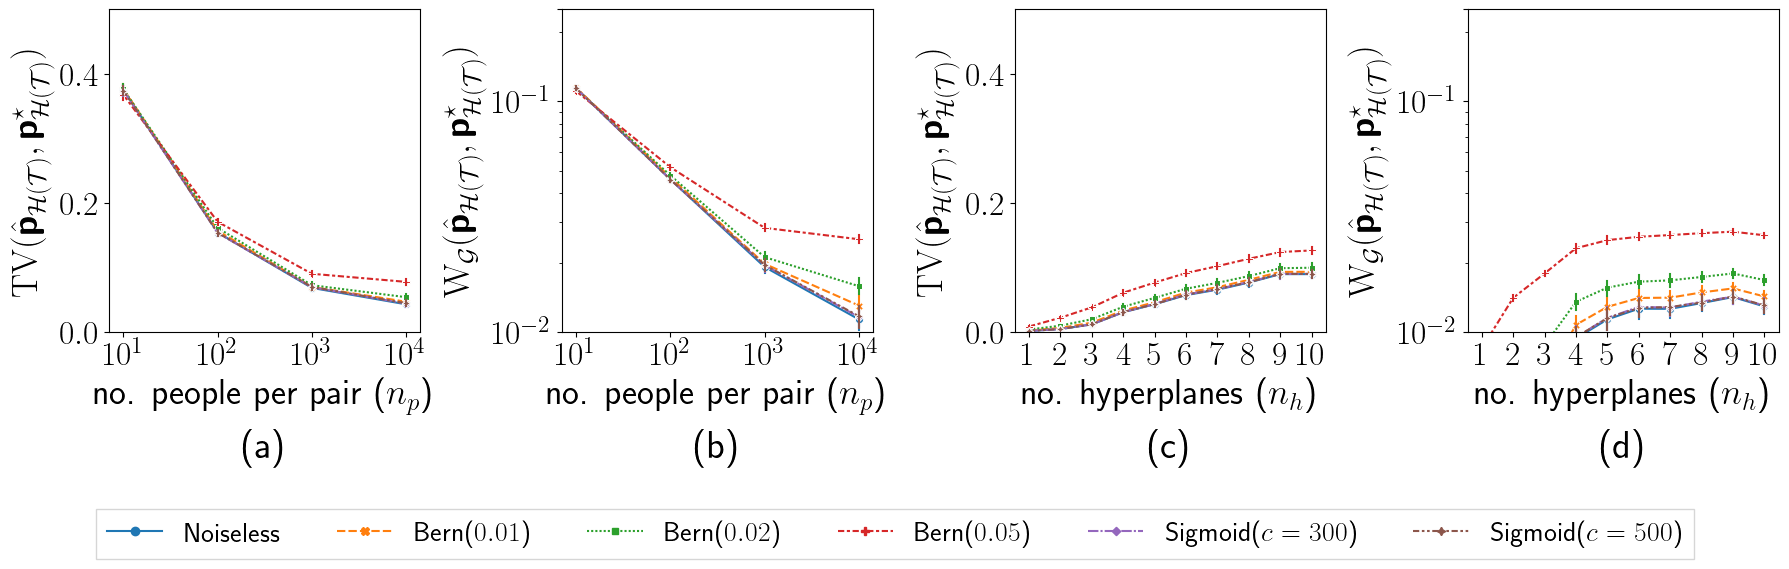

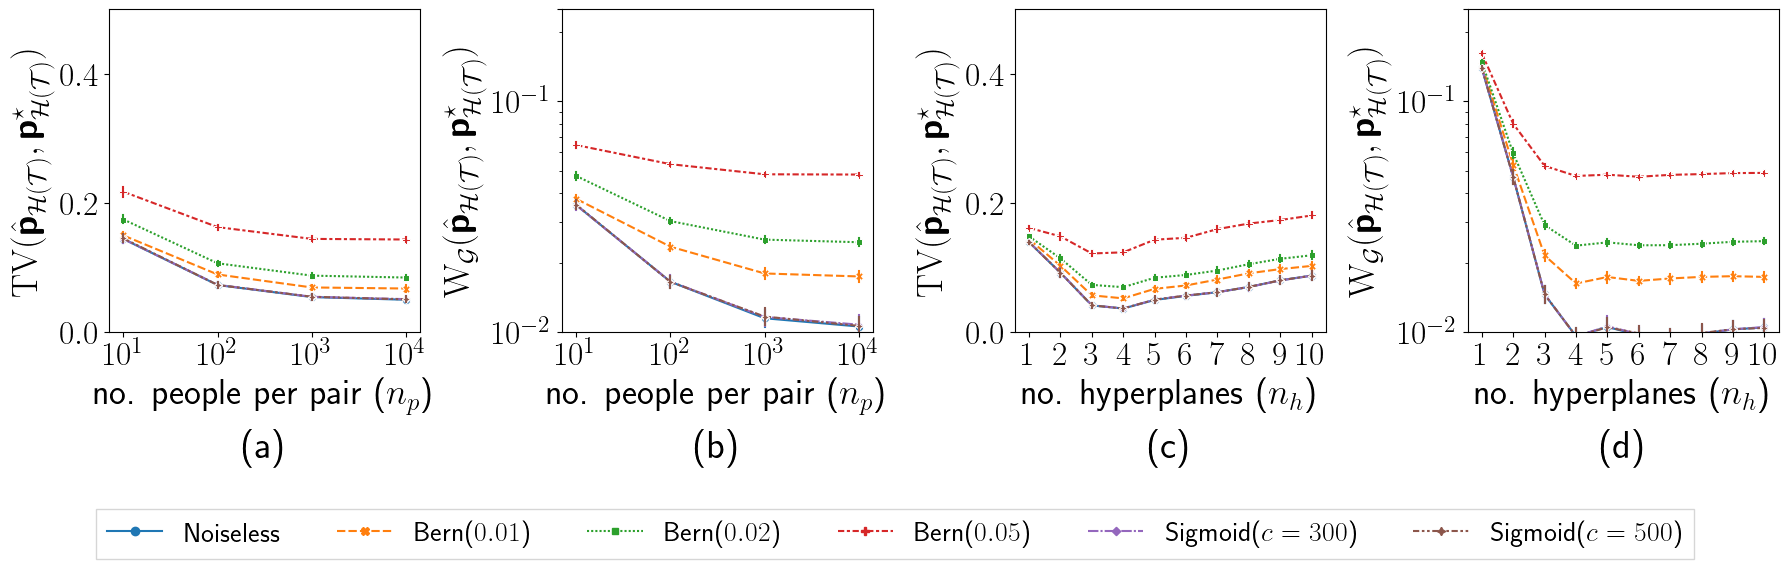

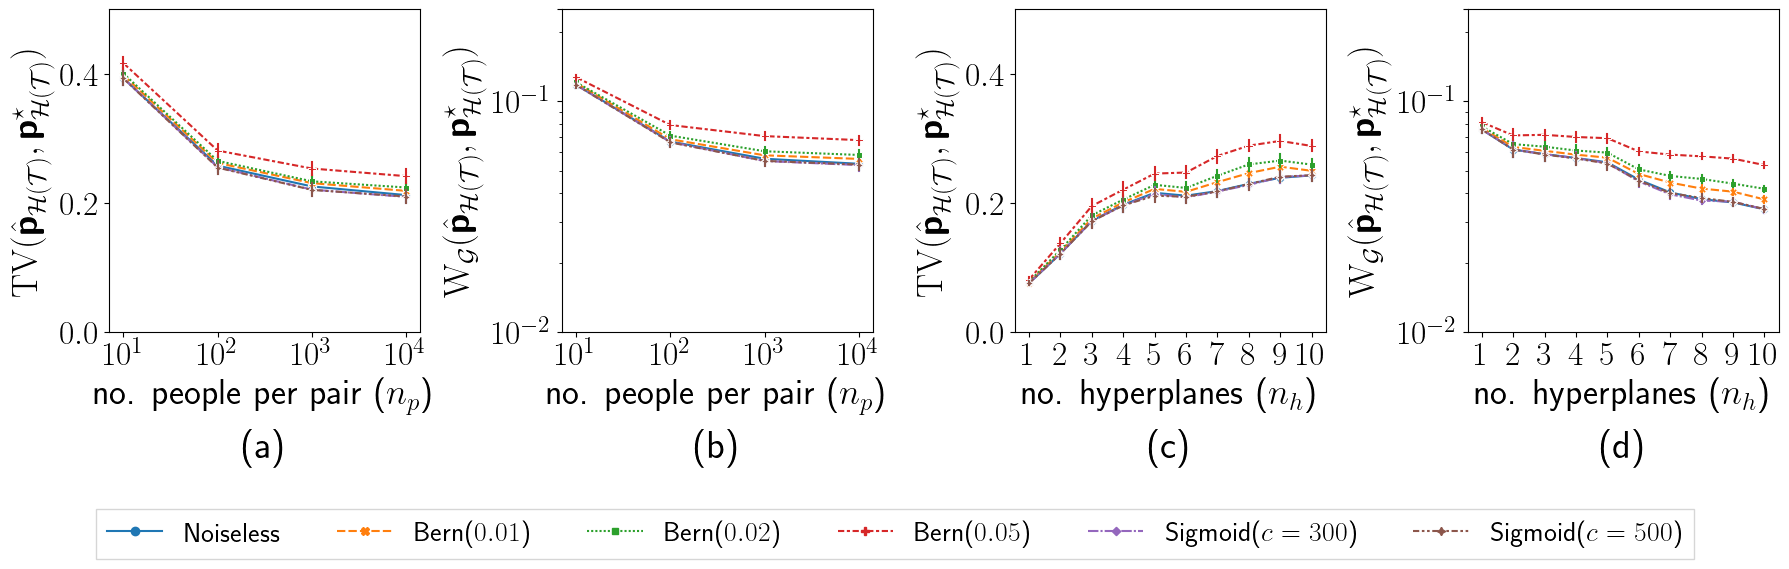

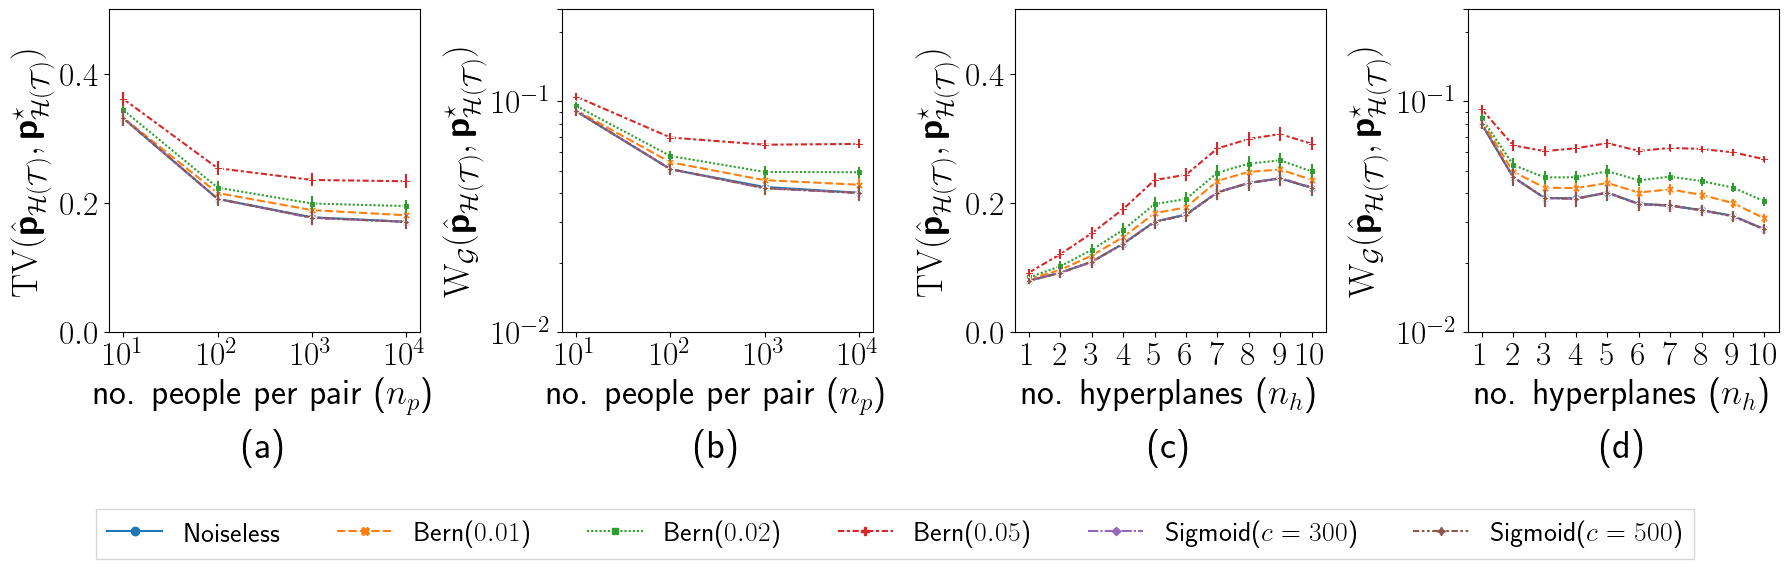

In [5]:
for user_dist in ["uniform", "gaussian", "mix2gaussian", "mix3gaussian"]:
    _df_n_p = df_n_p[(df_n_p.user_dist == user_dist) & (df_n_p.method  == "least-square-graph")] 
    _df_n_h = df_n_h[(df_n_h.user_dist == user_dist) & (df_n_h.method  == "least-square-graph")]

    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))

    sns.lineplot(data=_df_n_p,
                 x="n_p",
                 y="tv_err_q_hat",
                 err_style="bars",
                 markers=True,
                 hue="noise",
                 style="noise",
                 ax=axs[0])
    axs[0].set_ylim(0, 0.5)
    axs[0].set_xscale("log")
    axs[0].set_xticks([10, 100, 1000, 10000])
    axs[0].set_ylabel(TV, fontsize=label_size)
    axs[0].set_xlabel(r"no. people per pair ($n_p$)", fontsize=label_size)

    sns.lineplot(data=_df_n_p,
                 x="n_p",
                 y="wa_err_q_hat",
                 err_style="bars",
                 markers=True,
                 hue="noise",
                 style="noise",
                 ax=axs[1])
    axs[1].set_yscale("log")
    axs[1].set_ylim(0.01, 0.25)
    axs[1].set_yticks([0.01, 0.1, 0.25])
    axs[1].set_xscale("log")
    axs[1].set_xticks([10, 100, 1000, 10000])
    axs[1].set_ylabel(WA, fontsize=label_size)
    axs[1].set_xlabel(r"no. people per pair ($n_p$)", fontsize=label_size)

    sns.lineplot(data=_df_n_h,
                 x="n_h",
                 y="tv_err_q_hat",
                 err_style="bars",
                 markers=True,
                 hue="noise",
                 style="noise",
                 ax=axs[2])
    axs[2].set_ylim(0, 0.5)
    axs[2].set_xticks(list(range(1, 11)))
    axs[2].set_ylabel(TV, fontsize=label_size)
    axs[2].set_xlabel(r"no. hyperplanes ($n_h$)", fontsize=label_size)

    sns.lineplot(data=_df_n_h,
                 x="n_h",
                 y="wa_err_q_hat",
                 err_style="bars",
                 markers=True,
                 hue="noise",
                 style="noise",
                 ax=axs[3])
    axs[3].set_yscale("log")
    axs[3].set_ylim(0.01, 0.25)
    axs[3].set_yticks([0.01, 0.1, 0.25])
    axs[3].set_xticks(list(range(1, 11)))
    axs[3].set_ylabel(WA, fontsize=label_size)
    axs[3].set_xlabel(r"no. hyperplanes ($n_h$)", fontsize=label_size)


    handles, labels = axs[0].get_legend_handles_labels()
    new_labels = list(map(lambda x: label_mapping[x], labels))

    for i, ax in enumerate(axs):
        ax.get_legend().remove()
        ax.tick_params(axis='both', which='major', labelsize=tick_size)
        ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")

    fig.legend(handles, new_labels, loc="outside lower center", bbox_to_anchor=(0.5, -0.18), fancybox=False, shadow=False, ncol=6, fontsize=legend_size)
    fig.tight_layout()
    fig.savefig(f"fig/2d_figure1_{user_dist}.pdf", dpi=600, format="pdf", bbox_inches="tight")
    fig.show()

In [6]:
df_d = pd.read_parquet("varying_d_p1.parquet")
df_d = df_d.sort_values(by="noise", key=lambda x: list(map(lambda y: {"noiseless": 0, "bernoulli01": 1, "bernoulli02": 2, "bernoulli05": 3,"sigmoid300": 4, "sigmoid500": 5}[y], x)))

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/1536582584.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[1].set_ylim(0, 0.25)
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/1536582584.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/1536582584.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[1].set_ylim(0, 0.25)
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/1536582584.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/1536582584.py:30: UserWarning: Attempt to set non-positive ylim on a log-scale

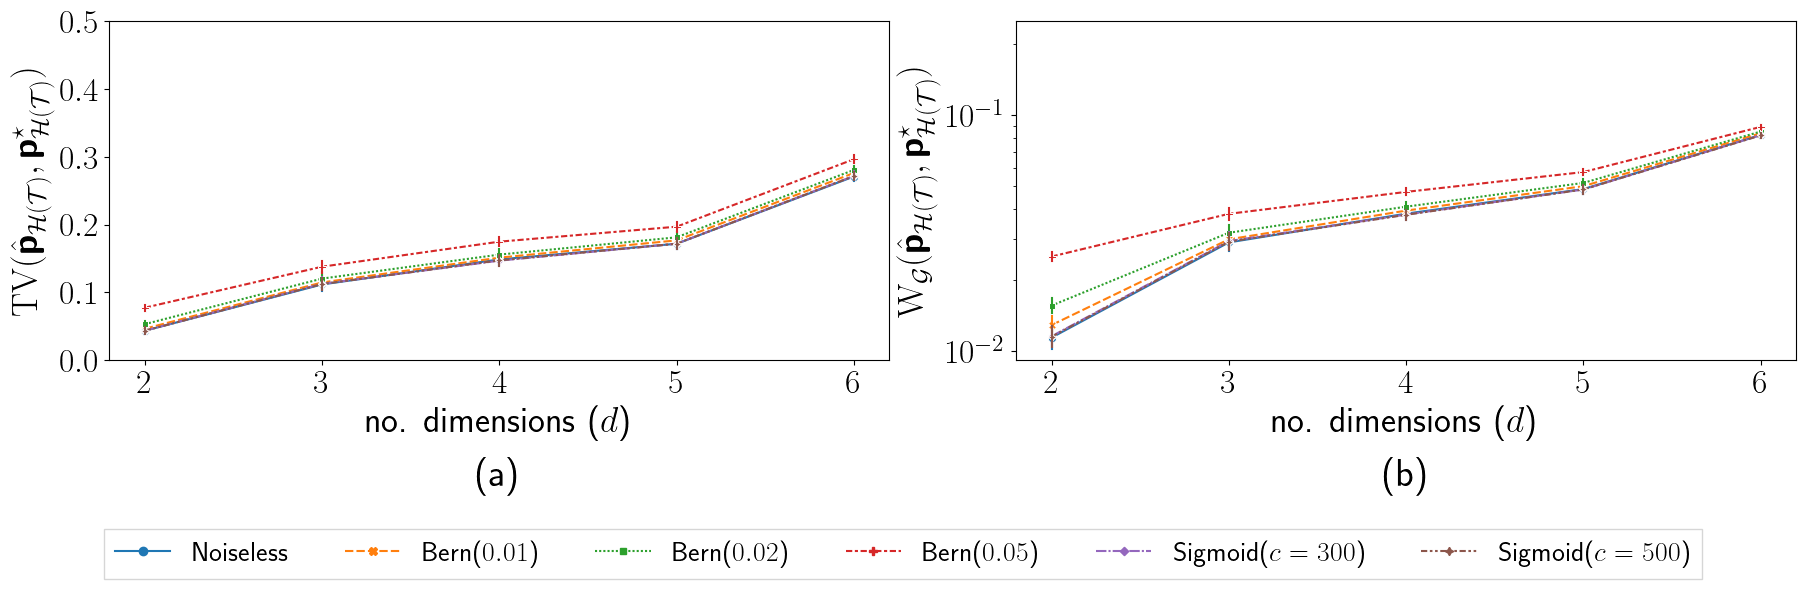

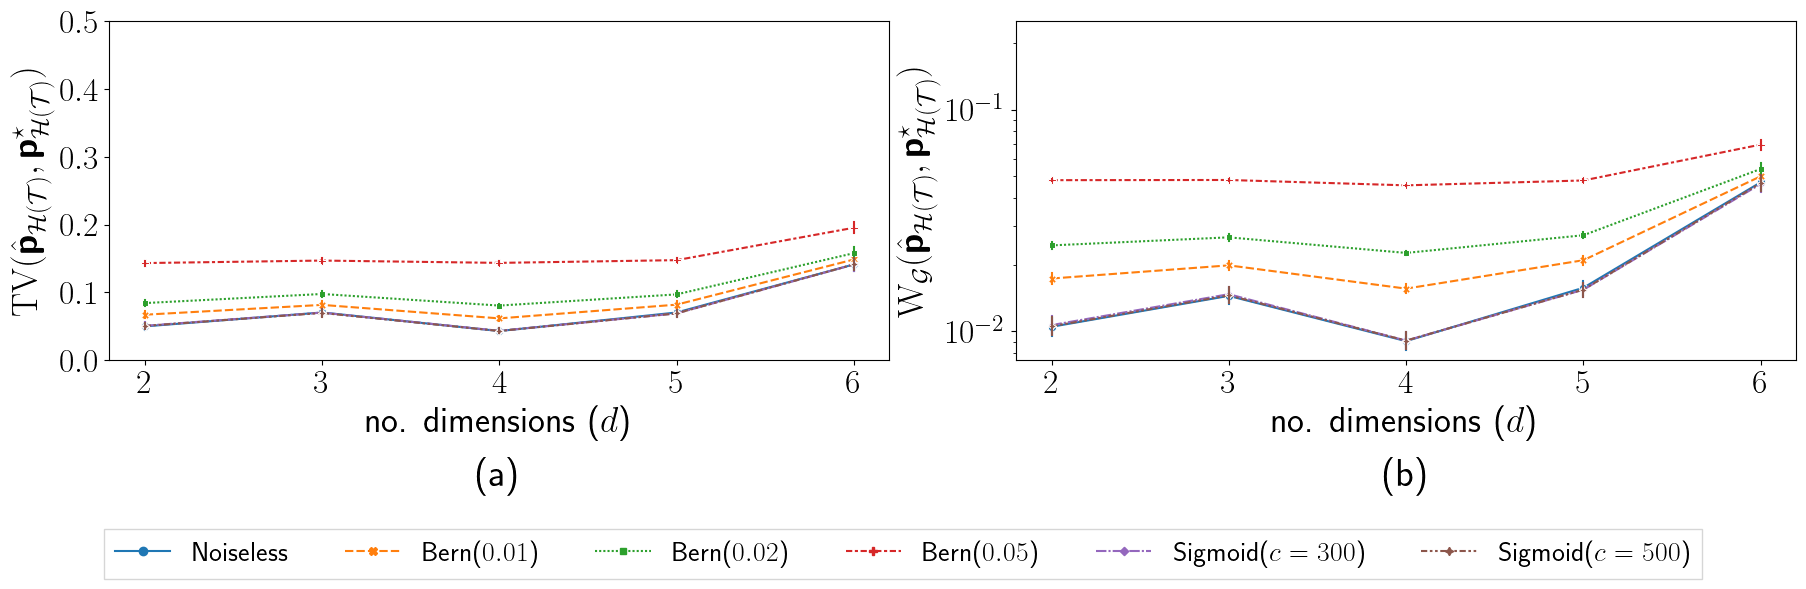

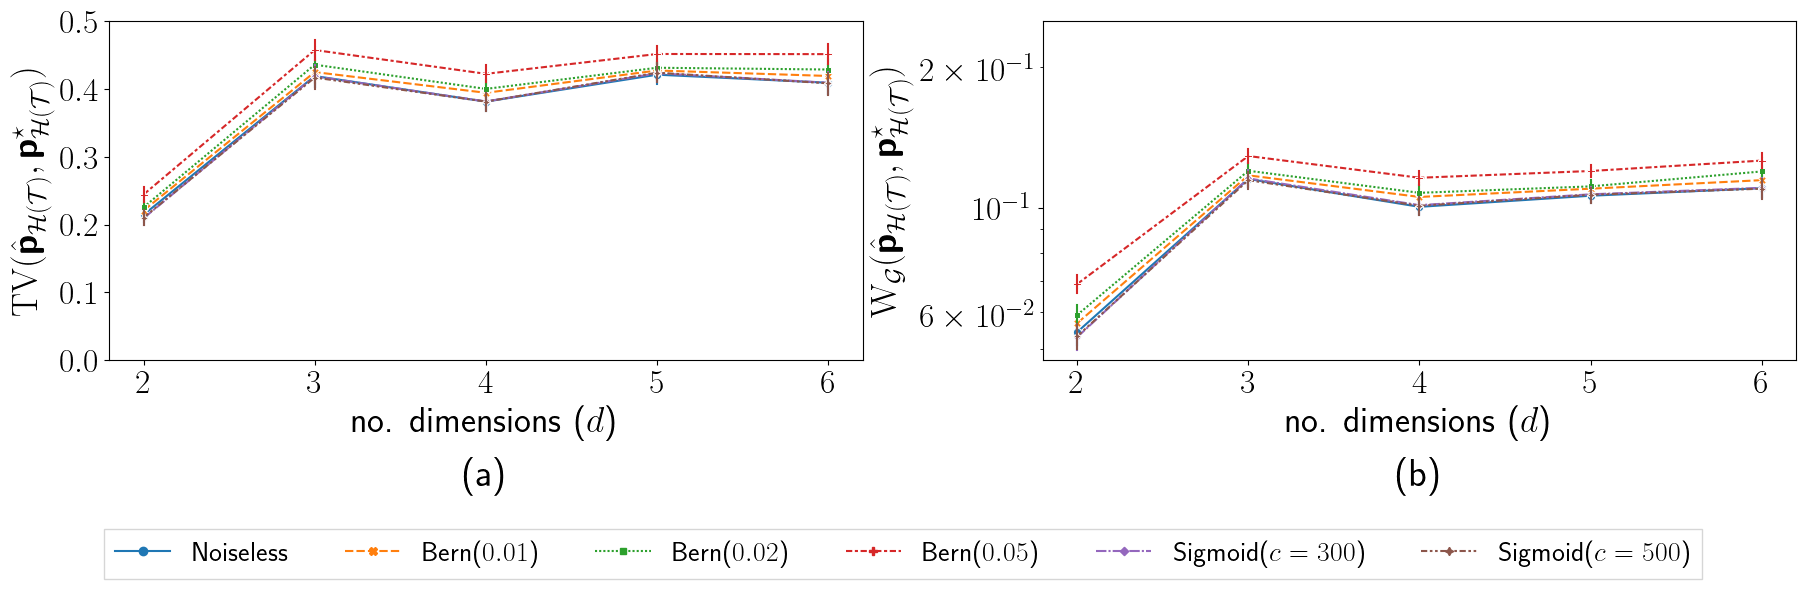

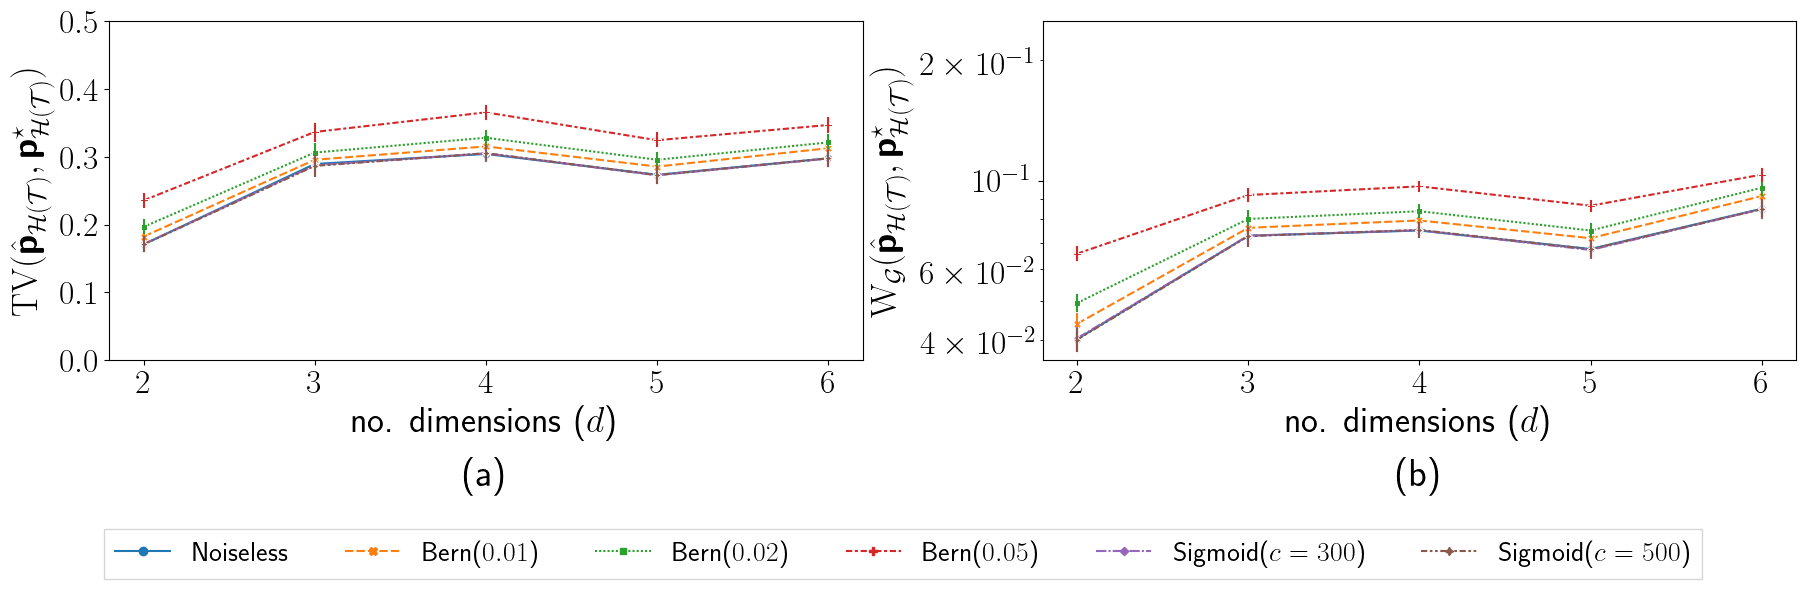

In [7]:
for user_dist in ["uniform", "gaussian", "mix2gaussian", "mix3gaussian"]:
    
    _df_d = df_d[(df_d.user_dist == user_dist) & (df_d.method  == "least-square-graph")] 

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

    sns.lineplot(data=_df_d,
                      x='d',
                      y='tv_err_q_hat',
                      err_style='bars',
                      markers=True,
                      hue="noise",
                      style="noise",
                      ax=axs[0])
    axs[0].set_ylim(0, 0.5)
    axs[0].set_xticks([2, 3, 4, 5, 6])
    axs[0].set_ylabel(TV, fontsize=label_size)
    axs[0].set_xlabel(r"no. dimensions ($d$)", fontsize=label_size)
    axs[0].tick_params(axis='both', which='major', labelsize=tick_size)

    sns.lineplot(data=_df_d,
                      x='d',
                      y='wa_err_q_hat',
                      err_style='bars',
                      markers=True,
                      hue="noise",
                      style="noise",
                      ax=axs[1])
    axs[1].set_yscale("log")
    axs[1].set_ylim(0, 0.25)
    axs[1].set_xticks([2, 3, 4, 5, 6])
    axs[1].set_ylabel(WA, fontsize=label_size)
    axs[1].set_xlabel(r"no. dimensions ($d$)", fontsize=label_size)
    axs[1].tick_params(axis='both', which='major', labelsize=tick_size)
    axs[1].tick_params(axis='both', which='minor', labelsize=tick_size)

    handles, labels = axs[0].get_legend_handles_labels()
    new_labels = list(map(lambda x: label_mapping[x], labels))

    handles, labels = axs[1].get_legend_handles_labels()
    new_labels = list(map(lambda x: label_mapping[x], labels))

    for i, ax in enumerate(axs):
        ax.get_legend().remove()
        ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")

    fig.legend(handles, new_labels, loc="outside lower center", bbox_to_anchor=(0.5, -0.18), fancybox=False, shadow=False, ncol=6, fontsize=legend_size)

    fig.tight_layout(pad=0.5)
    fig.savefig(f"fig/2d_figure2_{user_dist}.pdf", dpi=600, format="pdf", bbox_inches="tight")
    fig.show()

In [8]:
df_lambda_p1 = pd.read_parquet("varying_lambda_p1.parquet")
df_lambda_p1 = df_lambda_p1[df_lambda_p1.lamb <= 1e2 + 1]
df_lambda_p1 = df_lambda_p1.sort_values(by="method", key=lambda x: list(map(lambda y: {"least-square-graph": 0,
                                                                           "least-square-l1": 1,
                                                                           "least-square-l2": 2,
                                                                           "kl": 3,

                                                                           "graph-least-square": 4,
                                                                           "l1-least-square": 5,
                                                                           "l2-least-square": 6,

                                                                           "graph-kl": 7,
                                                                           "l1-kl": 8,
                                                                           "l2-kl": 9,
                                                                          }[y], x)))

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/3514238006.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 1])
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/3514238006.py:57: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 1])


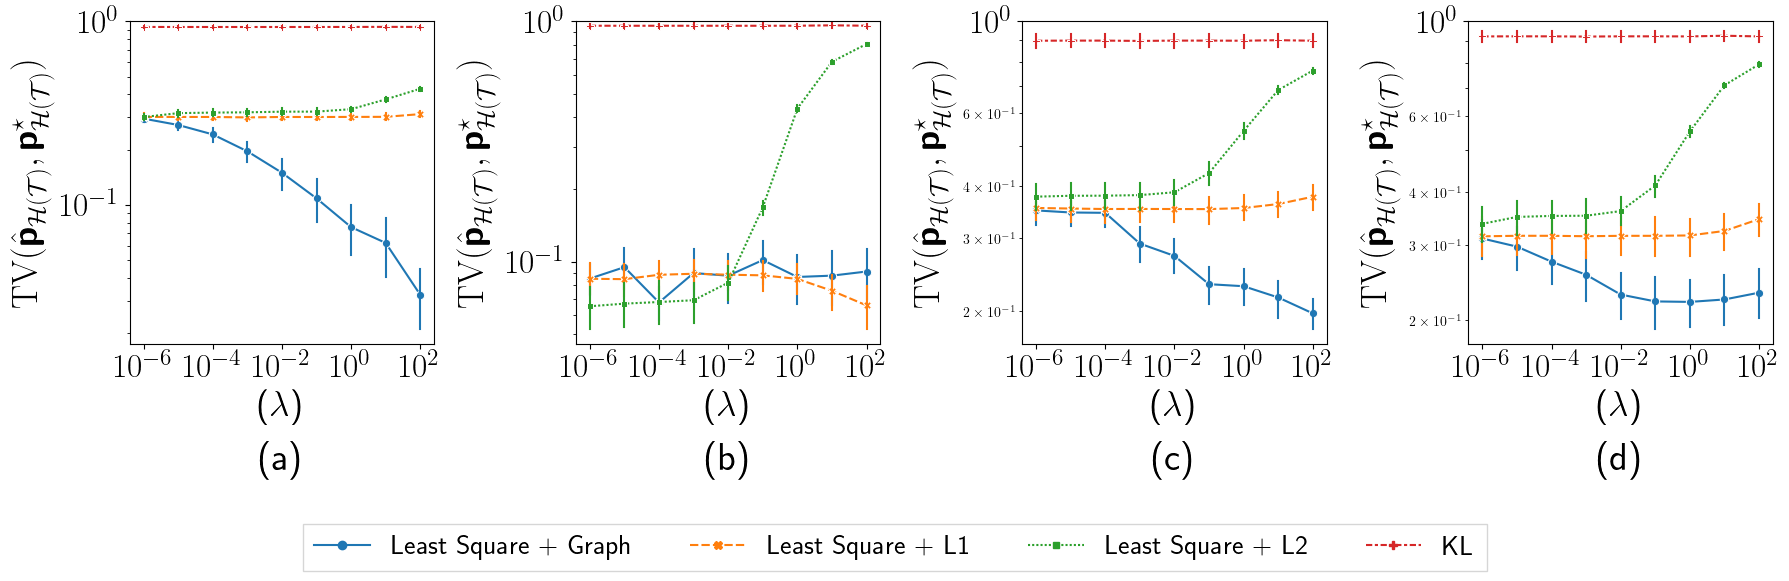

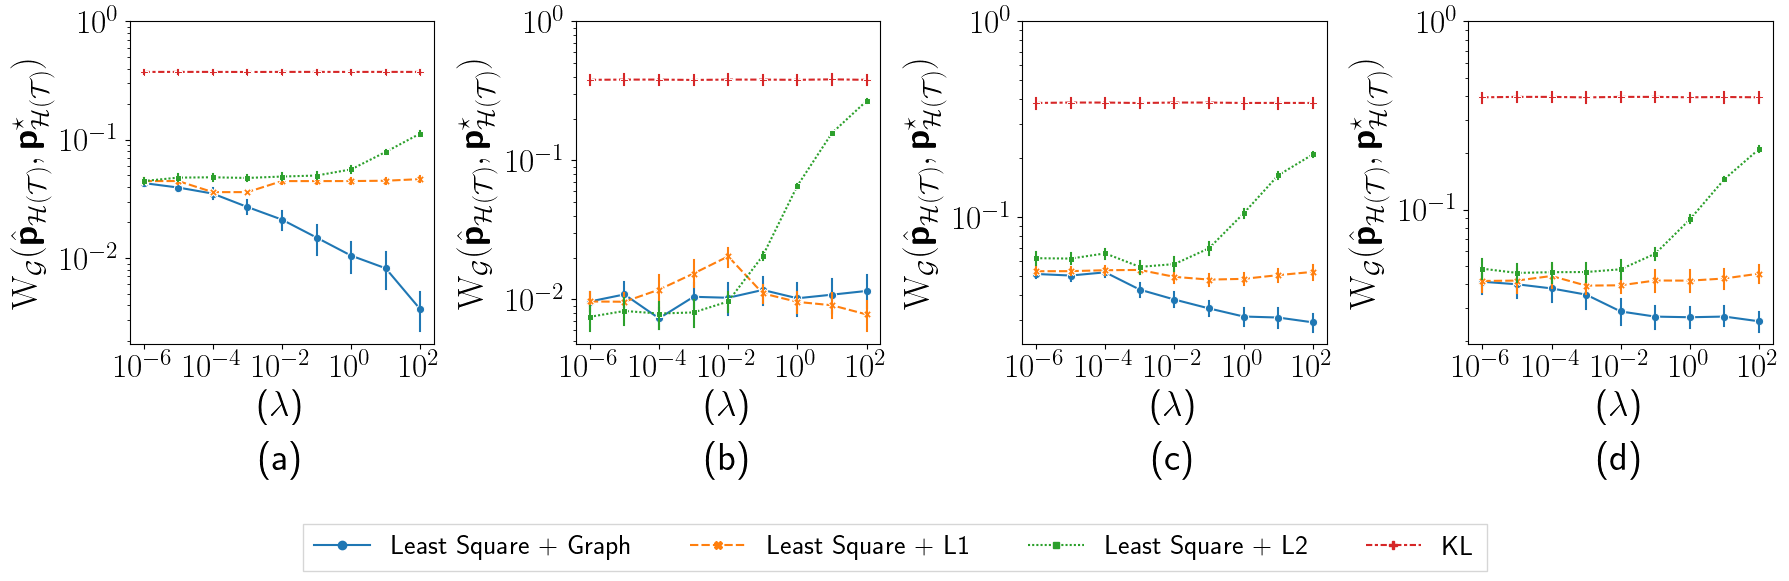

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))

for i, user_dist in enumerate(["uniform", "gaussian", "mix2gaussian", "mix3gaussian"]):

    sns.lineplot(data=df_lambda_p1[df_lambda_p1.user_dist == user_dist],
                 x="lamb",
                 y="tv_err_q_true",
                 err_style="bars",
                 markers=True,
                 hue="method",
                 style="method",
                 ax=axs[i])
    axs[i].set_xscale("log")
    axs[i].set_yscale("log")
    axs[i].set_xticks([1e-6, 1e-4, 1e-2, 1e0, 1e2])
    axs[i].set_ylabel(TV, fontsize=label_size)
    axs[i].set_xlabel(r"($\lambda$)", fontsize=label_size)
    
handles, labels = axs[0].get_legend_handles_labels()
new_labels = list(map(lambda x: label_mapping[x], labels))

for i, ax in enumerate(axs):
    ax.set_ylim([0, 1])
    ax.get_legend().remove()
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")
    
fig.legend(handles, new_labels, loc="outside lower center", bbox_to_anchor=(0.5, -0.18), fancybox=False, shadow=False, ncol=4, fontsize=legend_size)

fig.tight_layout()
fig.savefig(f"fig/2d_lambda_TV.pdf", dpi=600, format="pdf", bbox_inches="tight")



fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))

for i, user_dist in enumerate(["uniform", "gaussian", "mix2gaussian", "mix3gaussian"]):

    sns.lineplot(data=df_lambda_p1[df_lambda_p1.user_dist == user_dist],
                 x="lamb",
                 y="wa_err_q_true",
                 err_style="bars",
                 markers=True,
                 hue="method",
                 style="method",
                 ax=axs[i])
    axs[i].set_yscale("log")
    axs[i].set_xscale("log")
    axs[i].set_xticks([1e-6, 1e-4, 1e-2, 1e0, 1e2])
    axs[i].set_ylabel(WA, fontsize=label_size)
    axs[i].set_xlabel(r"($\lambda$)", fontsize=label_size)

handles, labels = axs[0].get_legend_handles_labels()
new_labels = list(map(lambda x: label_mapping[x], labels))
    
for i, ax in enumerate(axs):
    ax.set_ylim([0, 1])
    ax.get_legend().remove()
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")

fig.legend(handles, new_labels, loc="outside lower center", bbox_to_anchor=(0.5, -0.18), fancybox=False, shadow=False, ncol=4, fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"fig/2d_lambda_WA.pdf", dpi=600, format="pdf", bbox_inches="tight")

In [10]:
df_lambda_p2 = pd.read_parquet("varying_lambda_p2.parquet")
df_lambda_p2 = df_lambda_p2[df_lambda_p2.lamb <= 1e2 + 1]
# df_lambda_p2 = df_lambda_p2[(df_lambda_p2.method !="graph-kl") &
#                             (df_lambda_p2.method !="l1-kl") &
#                             (df_lambda_p2.method != "l2-kl")]
df_lambda_p2 = df_lambda_p2.sort_values(by="method", key=lambda x: list(map(lambda y: {"least-square-graph": 0,
                                                                           "least-square-l1": 1,
                                                                           "least-square-l2": 2,
                                                                           "kl": 3,

                                                                           "graph-least-square": 4,
                                                                           "l1-least-square": 5,
                                                                           "l2-least-square": 6,

                                                                           "graph-kl": 7,
                                                                           "l1-kl": 8,
                                                                           "l2-kl": 9,
                                                                          }[y], x)))

/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/1771287006.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 1])
/var/folders/0b/gtjn2bqj7hl7mth2hd2ybr700000gn/T/ipykernel_4557/1771287006.py:57: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 1])


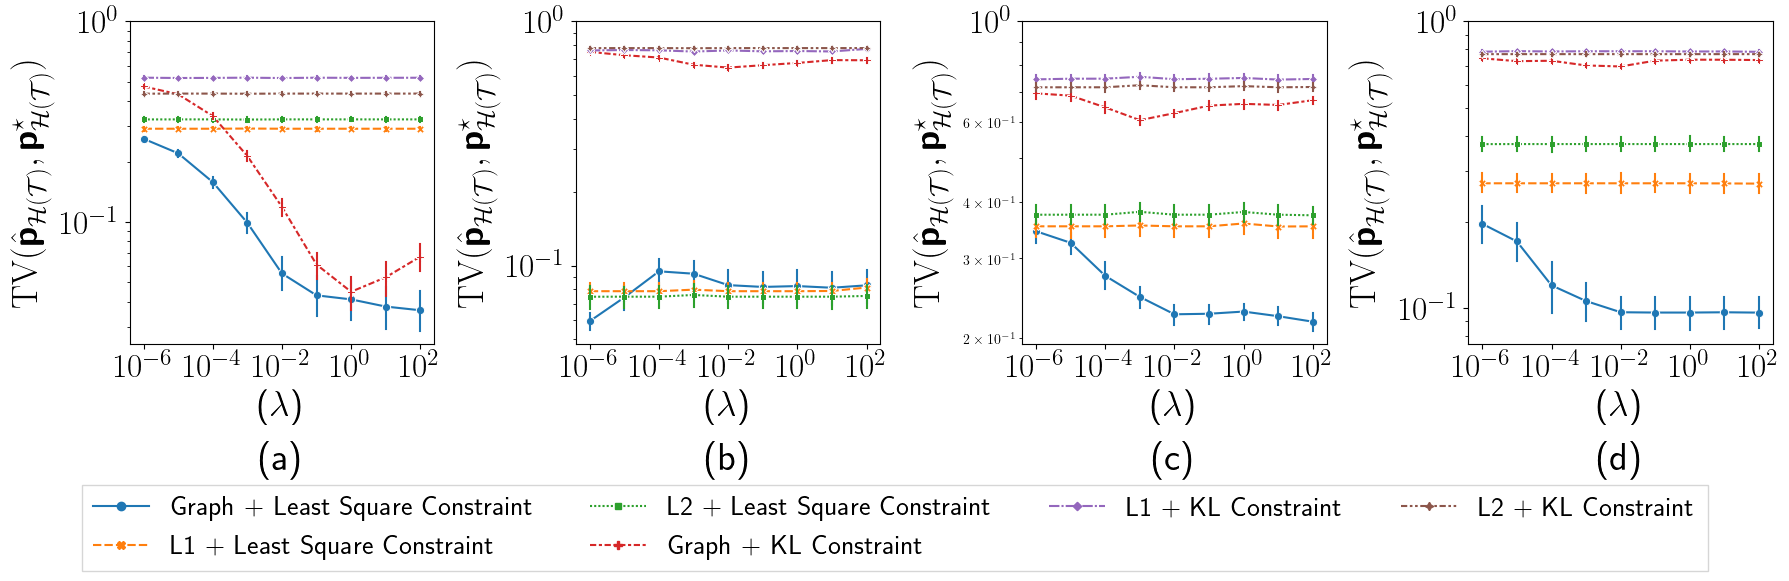

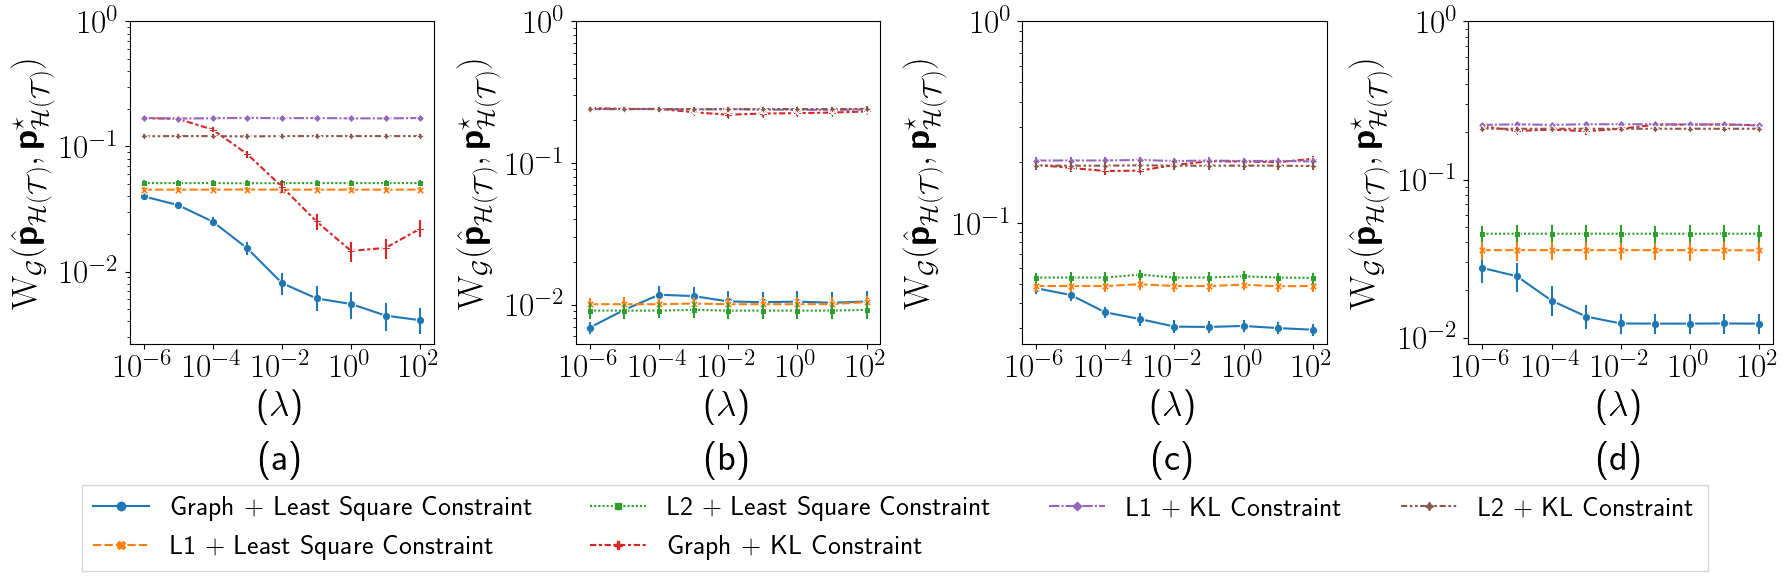

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))

for i, user_dist in enumerate(["uniform", "gaussian", "mix2gaussian", "mix3gaussian"]):

    sns.lineplot(data=df_lambda_p2[df_lambda_p2.user_dist == user_dist],
                 x="lamb",
                 y="tv_err_q_true",
                 err_style="bars",
                 markers=True,
                 hue="method",
                 style="method",
                 ax=axs[i])
    axs[i].set_xscale("log")
    axs[i].set_yscale("log")
    axs[i].set_xticks([1e-6, 1e-4, 1e-2, 1e0, 1e2])
    axs[i].set_ylabel(TV, fontsize=label_size)
    axs[i].set_xlabel(r"($\lambda$)", fontsize=label_size)
    
handles, labels = axs[0].get_legend_handles_labels()
new_labels = list(map(lambda x: label_mapping[x], labels))

for i, ax in enumerate(axs):
    ax.set_ylim([0, 1])
    ax.get_legend().remove()
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")
    
fig.legend(handles, new_labels, loc="outside lower center", bbox_to_anchor=(0.5, -0.18), fancybox=False, shadow=False, ncol=4, fontsize=legend_size)

fig.tight_layout()
fig.savefig(f"fig/2d_lambda_TV_p2.pdf", dpi=600, format="pdf", bbox_inches="tight")



fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))

for i, user_dist in enumerate(["uniform", "gaussian", "mix2gaussian", "mix3gaussian"]):

    sns.lineplot(data=df_lambda_p2[df_lambda_p2.user_dist == user_dist],
                 x="lamb",
                 y="wa_err_q_true",
                 err_style="bars",
                 markers=True,
                 hue="method",
                 style="method",
                 ax=axs[i])
    axs[i].set_xscale("log")
    axs[i].set_yscale("log")
    axs[i].set_xticks([1e-6, 1e-4, 1e-2, 1e0, 1e2])
    axs[i].set_ylabel(WA, fontsize=label_size)
    axs[i].set_xlabel(r"($\lambda$)", fontsize=label_size)

handles, labels = axs[0].get_legend_handles_labels()
new_labels = list(map(lambda x: label_mapping[x], labels))
    
for i, ax in enumerate(axs):
    ax.set_ylim([0, 1])
    ax.get_legend().remove()
    ax.tick_params(axis='both', which='major', labelsize=tick_size)
    ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-70, verticalalignment="top")

fig.legend(handles, new_labels, loc="outside lower center", bbox_to_anchor=(0.5, -0.18), fancybox=False, shadow=False, ncol=4, fontsize=legend_size)
fig.tight_layout()
fig.savefig(f"fig/2d_lambda_WA_p2.pdf", dpi=600, format="pdf", bbox_inches="tight")

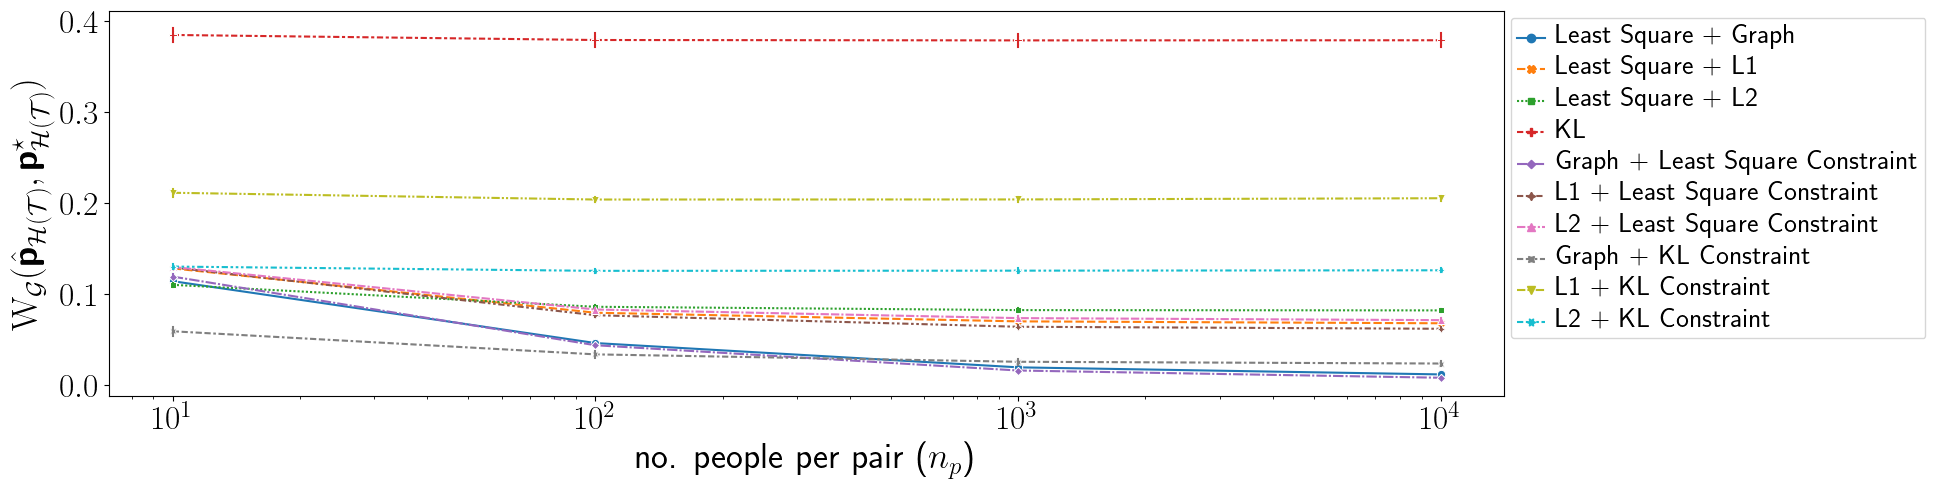

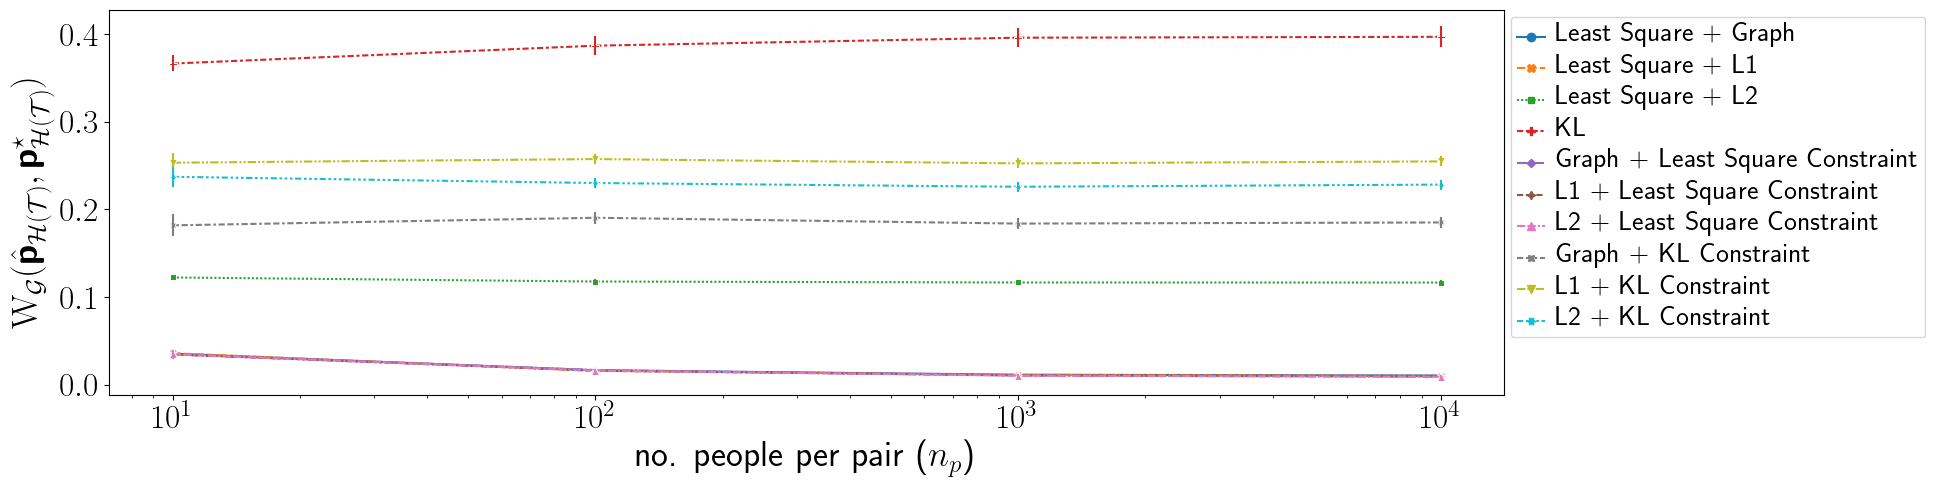

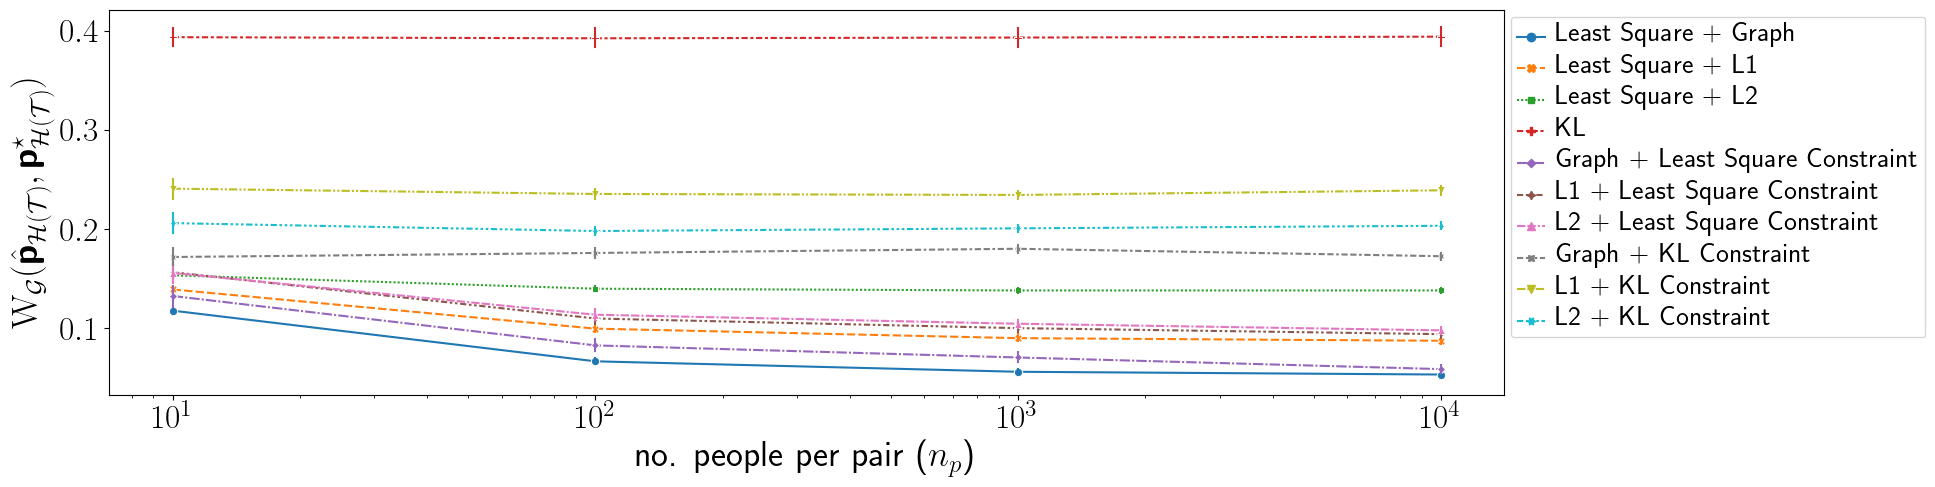

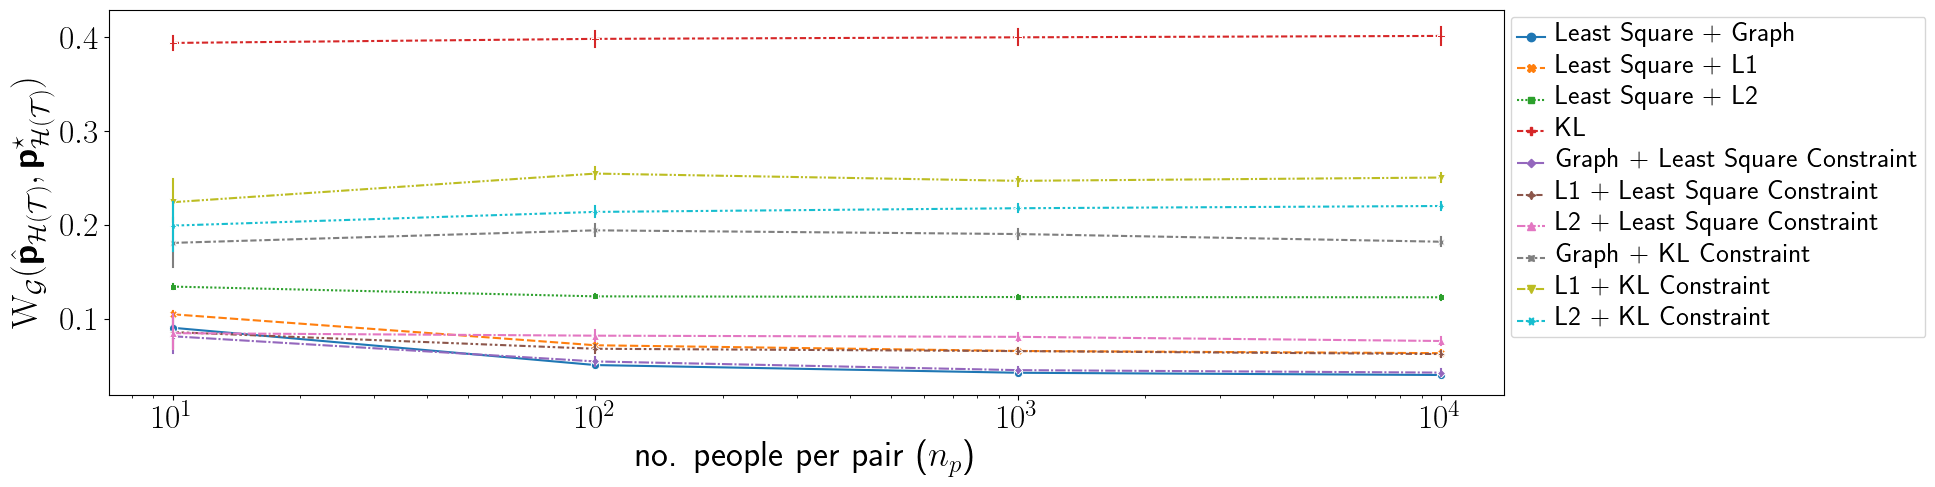

In [12]:
label_mapping = {
    "noiseless": "Noiseless",
    "bernoulli01": r"Bern($0.01$)",
    "bernoulli02": r"Bern($0.02$)",
    "bernoulli05": r"Bern($0.05$)",
    "sigmoid500": r"Sigmoid($c=500$)",
    "sigmoid300": r"Sigmoid($c=300$)",
    "least-square-graph": "Least Square + Graph",
    "least-square-l1": "Least Square + L1",
    "least-square-l2": "Least Square + L2",
    "kl": "KL",
    "graph-least-square": "Graph + Least Square Constraint",
    "l1-least-square": "L1 + Least Square Constraint",
    "l2-least-square": "L2 + Least Square Constraint",
    "graph-kl": "Graph + KL Constraint",
    "l1-kl": "L1 + KL Constraint",
    "l2-kl": "L2 + KL Constraint",
}

for user_dist in ["uniform", "gaussian", "mix2gaussian", "mix3gaussian"]:
    df_n_p = pd.concat(
        [
            pd.read_parquet("varying_n_p_p1.parquet"),
            pd.read_parquet("varying_n_p_p2.parquet"),
        ]
    )
    df_n_p.set_index(np.arange(len(df_n_p)), inplace=True)
    df_n_p = df_n_p[(df_n_p.noise == "noiseless") & (df_n_p.user_dist == user_dist)]
    df_n_p = df_n_p.sort_values(
        by="method",
        key=lambda x: list(
            map(
                lambda y: {
                    "least-square-graph": 0,
                    "least-square-l1": 1,
                    "least-square-l2": 2,
                    "kl": 3,
                    "graph-least-square": 4,
                    "l1-least-square": 5,
                    "l2-least-square": 6,
                    "graph-kl": 7,
                    "l1-kl": 8,
                    "l2-kl": 9,
                }[y],
                x,
            )
        ),
    )
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))
    sns.lineplot(
        data=df_n_p,
        x="n_p",
        y="wa_err_q_hat",
        err_style="bars",
        markers=True,
        hue="method",
        style="method",
        ax=ax,
    )
    ax.tick_params(axis="both", which="major", labelsize=tick_size)
    ax.legend(fontsize=legend_size, title_fontsize=legend_size)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_xscale("log")
    ax.set_xticks([10, 100, 1000, 10000])
    ax.set_ylabel(WA, fontsize=label_size)
    ax.set_xlabel(r"no. people per pair ($n_p$)", fontsize=label_size)

    for t in ax.get_legend().texts:
        t.set_text(label_mapping[t.get_text()])
        t.set_fontsize(legend_size)
    fig.savefig(
        f"fig/2d_figure2_method_{user_dist}.png",
        dpi=300,
        bbox_inches="tight",
    )